# Modeling Phase 1: Naive Approch

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling-Phase-1:-Naive-Approch" data-toc-modified-id="Modeling-Phase-1:-Naive-Approch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling Phase 1: Naive Approch</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Merge-Goolge-dataset-with-Income-dataset" data-toc-modified-id="Merge-Goolge-dataset-with-Income-dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Merge Goolge dataset with Income dataset</a></span></li><li><span><a href="#Shuffle-the-dataset" data-toc-modified-id="Shuffle-the-dataset-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Shuffle the dataset</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Create-interaction-columns-using-Google-dataset" data-toc-modified-id="Create-interaction-columns-using-Google-dataset-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Create interaction columns using Google dataset</a></span></li><li><span><a href="#Create-interaction-columns-using-demographic-information-from-'income'-dataset" data-toc-modified-id="Create-interaction-columns-using-demographic-information-from-'income'-dataset-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Create interaction columns using demographic information from 'income' dataset</a></span></li><li><span><a href="#Dummify-categorical-columns" data-toc-modified-id="Dummify-categorical-columns-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Dummify categorical columns</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Model-preparation" data-toc-modified-id="Model-preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model preparation</a></span></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Tree" data-toc-modified-id="Tree-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Tree</a></span></li></ul></li></ul></div>

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

# Display Preference
pd.set_option('display.max_columns', None)

## Read in data

In [2]:
google = pd.read_csv('../data/clean_google_data_nyc.csv')
income = pd.read_csv('../data/clean_income_by_zip_nyc.csv')

## Merge Goolge dataset with Income dataset

Note that 'inner' is used here for the merge. If any zipcode that doesn't exist in Google but in Income will be dropped and vice verse.

In [3]:
df = pd.merge(google, income, how='inner', left_on='zipcode', right_on='zipcode')

In [4]:
df.shape

(8166, 72)

In [5]:
df.head()

,zipcode,name,open_now,place_id,price_level,rating,user_ratings_total,searched_keyword,searched_zipcode,location_lat,location_lng,compound_code,global_code,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,population,population_density_square_miles,housing_units,home_price_to_income_ratios
0,10031,Sugar Hill Cafe,True,ChIJTdM-m3z2wokR6xZB62deoYY,NaN,4.5,362,coffee shops,10030,40.824202,-73.945600,R3F3+MQ New York,87G8R3F3+MQ,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,60254,92805.8,23802,8.358221
1,10031,Pet Ark Inc,True,ChIJy4ahbGT2wokRyfIagpfOE0Y,NaN,4.4,93,stores,10031,40.823917,-73.951950,R2FX+H6 New York,87G8R2FX+H6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,60254,92805.8,23802,8.358221
2,10031,Grill on the Hill,True,ChIJheSk_GT2wokR-MLgSDMoiAk,2.0,4.1,385,restaurant,10031,40.822315,-73.950147,R2CX+WW New York,87G8R2CX+WW,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,60254,92805.8,23802,8.358221
3,10031,Foodtown of St. Nicholas Ave,True,ChIJAevUyn32wokRkzP0mEI6lIo,NaN,4.1,756,stores,10031,40.825960,-73.943139,R3G4+9P New York,87G8R3G4+9P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,60254,92805.8,23802,8.358221
4,10031,Hamilton's Cafe Restaurant,False,ChIJfeGy52L2wokRzh1E8y2l2MU,2.0,4.2,294,coffee shops,10031,40.827344,-73.949401,R3G2+W6 New York,87G8R3G2+W6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,60254,92805.8,23802,8.358221


## Shuffle the dataset
Shuffling the dataset is crucial; otherwise it would be problematic during the cross validation process, since Sklearn's cross validation does not shuffle the dataset.

In [6]:
index = df.index
df = shuffle(df)
df.index = index

## Feature Engineering

### Create interaction columns using Google dataset

In [7]:
df['price_level*rating'] = df['price_level'] * df['rating']

In [8]:
# Create column 'avg_price_level_by_zipcode', which calculate the avg price level for each zipcode
df['avg_price_level_by_zipcode'] = [df.groupby('zipcode')['price_level'].mean()[zipcode] 
                                    for zipcode in df['zipcode']]

In [9]:
# Avarage rating by zipcode
df['avg_rating_by_zipcode'] = [df.groupby('zipcode')['rating'].mean()[zipcode] 
                               for zipcode in df['zipcode']]

In [10]:
# Avarage rating_count by zipcode
df['avg_user_ratings_total_by_zipcode'] = [df.groupby('zipcode')['user_ratings_total'].mean()[zipcode] 
                                           for zipcode in df['zipcode']]

In [11]:
# Total number of bars by zipcode. 
# Limitation: this approach has limiattion since our dataset is merely a sample of the businesses for each zipcode.
df['total_number_of_bars_by_zipcode'] = [df.groupby('zipcode')['bar'].sum()[zipcode] 
                                         for zipcode in df['zipcode']]


In [12]:
# Total number of cafe by zipcode. 
# Limitation: this approach has limiattion since our dataset is merely a sample of the businesses for each zipcode.
df['total_number_of_cafes_by_zipcode'] = [df.groupby('zipcode')['cafe'].sum()[zipcode] 
                                          for zipcode in df['zipcode']]

### Create interaction columns using demographic information from 'income' dataset

In [13]:
# Create column user ratings counts devided by the population in the given zipcode
df['user_ratings_total_per_capita'] = df['user_ratings_total'] / df['population']

In [14]:
# Create column rating weighed with population density in the given zipcode
df['rating_weighed_population_density'] = df['rating'] * df['population_density_square_miles']

### Dummify categorical columns

In [15]:
# drop_first=False since we might not use linear regression models
df = pd.get_dummies(df, columns=['open_now'], drop_first=False, dummy_na=True)

# Modeling

## Model preparation

In [16]:
columns = [
       'price_level', 'rating',
       'user_ratings_total', 
       'art_gallery', 'atm', 'bakery', 'bar', 'beauty_salon', 'bicycle_store',
       'book_store', 'cafe', 'car_dealer', 'car_repair', 'car_wash',
       'clothing_store', 'convenience_store', 'department_store', 'drugstore',
       'electronics_store', 'establishment', 'finance', 'florist', 'food',
       'funeral_home', 'furniture_store', 'gas_station', 'general_contractor',
       'grocery_or_supermarket', 'hair_care', 'hardware_store', 'health',
       'home_goods_store', 'jewelry_store', 'laundry', 'liquor_store',
       'local_government_office', 'locksmith', 'lodging', 'meal_delivery',
       'meal_takeaway', 'movie_rental', 'night_club', 'park', 'parking',
       'pet_store', 'pharmacy', 'point_of_interest', 'premise', 'restaurant',
       'school', 'shoe_store', 'shopping_mall', 'spa', 'storage', 'store',
       'supermarket', 'tourist_attraction', 'travel_agency', 'population',
       'population_density_square_miles', 'housing_units',
       'home_price_to_income_ratios', 'price_level*rating',
       'avg_price_level_by_zipcode', 'avg_rating_by_zipcode',
       'avg_user_ratings_total_by_zipcode', 'total_number_of_bars_by_zipcode',
       'total_number_of_cafes_by_zipcode', 'user_ratings_total_per_capita',
       'rating_weighed_population_density', 'open_now_False', 'open_now_True',
       'open_now_nan'
]

In [17]:
final = df[columns].dropna()

In [18]:
final.head()

,price_level,rating,user_ratings_total,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,population,population_density_square_miles,housing_units,home_price_to_income_ratios,price_level*rating,avg_price_level_by_zipcode,avg_rating_by_zipcode,avg_user_ratings_total_by_zipcode,total_number_of_bars_by_zipcode,total_number_of_cafes_by_zipcode,user_ratings_total_per_capita,rating_weighed_population_density,open_now_False,open_now_True,open_now_nan
0,1.0,4.5,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,20801,15418.1,6584,6.111280,4.5,1.583333,4.292857,185.964286,2,3,0.002452,69381.45,0,1,0
1,2.0,4.1,949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,71360,49208.9,29973,4.908541,8.2,1.697674,4.069811,404.811321,9,14,0.013299,201756.49,0,1,0
4,1.0,4.4,225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,42653,45228.0,20974,5.721885,4.4,1.675676,4.040816,470.163265,8,10,0.005275,199003.20,0,1,0
5,2.0,4.2,464,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,20801,15418.1,6584,6.111280,8.4,1.583333,4.292857,185.964286,2,3,0.022307,64756.02,0,1,0
8,2.0,3.9,172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,93967,61733.7,33886,10.657836,7.8,1.658537,4.076923,1042.788462,3,12,0.001830,240761.43,0,1,0


In [19]:
target = 'home_price_to_income_ratios'
X = final.drop(columns=target)
y = final[target]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.70)

## Baseline Model

[reference](https://chrisalbon.com/machine_learning/model_evaluation/create_baseline_regression_model/)

In [21]:
dummy_mean = DummyRegressor(strategy='mean', constant=20).fit(X_train, y_train)

In [22]:
dummy_mean.score(X_train, y_train)

0.0

In [23]:
dummy_mean.score(X_test, y_test)

-1.4348901402172487e-05

## Linear Regression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr.score(X_train, y_train)

0.20156186295111123

In [27]:
lr.score(X_test, y_test)

0.22338322423808477

In [28]:
cross_val_score(lr, X, y, cv=5).mean()

0.19122934914794565

## KNN

In [29]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipe_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__p' : [1, 2],
    'knn__weights' : ['uniform', 'distance']
}

gs_knn = GridSearchCV(
    pipe,
    pipe_params,
    cv=5
).fit(X_train, y_train);

In [30]:
gs_knn.best_params_

{'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}

In [31]:
gs_knn.best_score_

0.5755138458871232

In [32]:
gs_knn.score(X_train, y_train)

1.0

In [33]:
gs_knn.score(X_test, y_test)

0.6803089220782124

In [34]:
cross_val_score(gs_knn.best_estimator_, X, y, scoring='r2', cv=5).mean()

0.6632024576726673

## Tree

In [35]:
# Use grid search to find best hyperparams
tree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [36]:
tree.score(X_train, y_train)

1.0

In [37]:
tree.score(X_test, y_test)

1.0

In [38]:
cross_val_score(tree, X, y, scoring='r2', cv=5).mean()

0.9977539664592104

In [39]:
feature_importance = pd.DataFrame(dict(zip(X_train.columns, tree.feature_importances_)).items())

In [40]:
feature_importance = feature_importance.sort_values(by=[1])

<BarContainer object of 72 artists>

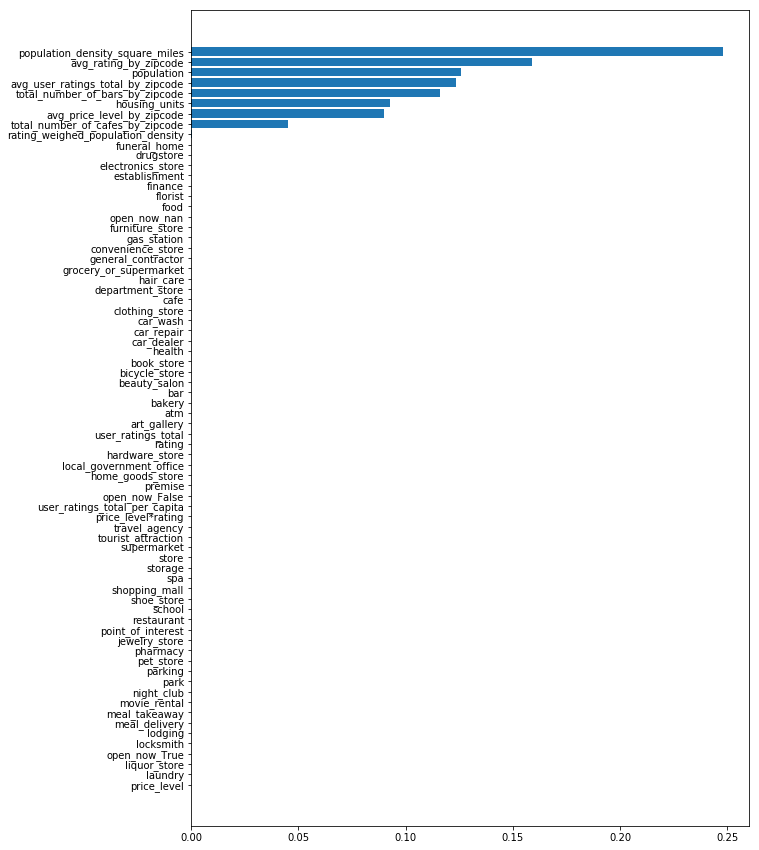

In [41]:
plt.figure(figsize=(10, 15))
plt.barh(y = feature_importance[0], width=feature_importance[1])

In [42]:
preds = tree.predict(X_test)

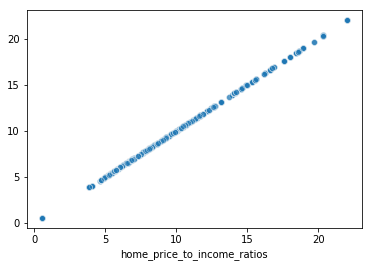

In [43]:
sns.scatterplot(x = y_test, y = preds, alpha = .5)

In [44]:
resids = y_test - preds

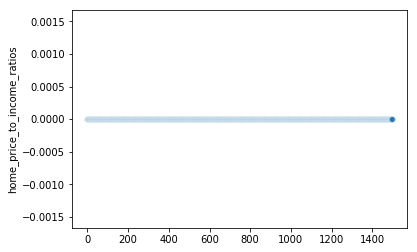

In [45]:
sns.scatterplot(x = range(len(resids)),y = resids, alpha = .5)